# Scatter Plot

In [1]:
# import pandas as pd
# df = pd.read_json('../cars.json')

In [ ]:
from vega_datasets import data
df = data.cars()

In [ ]:
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


## Altair

based on the example <https://altair-viz.github.io/gallery/scatter_tooltips.html>

In [ ]:
import altair as alt

In [ ]:
alt.Chart(df).mark_point()

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
)

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_point(color='forestgreen').encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon', title='Economy (miles/gallon)')
)

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon', title='Economy (miles/gallon)'),
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
)

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_circle(size=60).encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon', title='Economy (miles/gallon)'),
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

alt.Chart(...)

## Vega-Lite

We can also display Vega-Lite and Vega specifications directly in Jupyter Labs.

However, we will likely never need that, as we can create most visualizations using Altair.

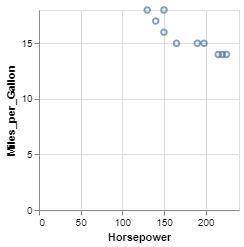

In [ ]:
display({
    "application/vnd.vegalite.v4+json": {
        "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
        "data": {
            "values": [
                {'Miles_per_Gallon': 18.0, 'Horsepower': 130.0},
                {'Miles_per_Gallon': 15.0, 'Horsepower': 165.0},
                {'Miles_per_Gallon': 18.0, 'Horsepower': 150.0},
                {'Miles_per_Gallon': 16.0, 'Horsepower': 150.0},
                {'Miles_per_Gallon': 17.0, 'Horsepower': 140.0},
                {'Miles_per_Gallon': 15.0, 'Horsepower': 198.0},
                {'Miles_per_Gallon': 14.0, 'Horsepower': 220.0},
                {'Miles_per_Gallon': 14.0, 'Horsepower': 215.0},
                {'Miles_per_Gallon': 14.0, 'Horsepower': 225.0},
                {'Miles_per_Gallon': 15.0, 'Horsepower': 190.0}
            ]
        },
        "mark": "point",
        "encoding": {
            "x": {"type": "quantitative", "field": "Horsepower"},
            "y": {"type": "quantitative", "field": "Miles_per_Gallon"}
        }
    }
}, raw=True)

In [ ]:
spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "mark": "point",
  "encoding": {
    "y": {"type": "quantitative", "field": "Horsepower"},
    "x": {"type": "quantitative", "field": "Miles_per_Gallon"}
  }
}

In [ ]:
subset_as_list = df[[ "Miles_per_Gallon", "Horsepower"]].to_dict('records')
spec["data"] = {"values": subset_as_list}

In [ ]:
# spec

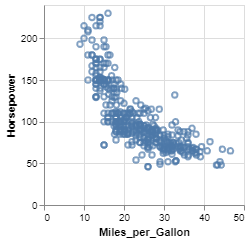

c:\users\arind\documents\scm\dvis4-examples\venv\lib\site-packages\jupyter_client\session.py:716: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [ ]:
display({"application/vnd.vegalite.v4+json": spec }, raw=True)

In [ ]:
# based on <https://github.com/jupyterlab/jupyterlab/blob/master/examples/vega/vega-extension.ipynb>

def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

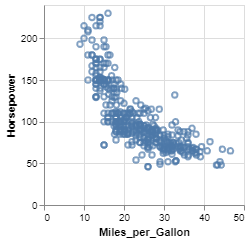

In [17]:
VegaLite(spec)

In [18]:
## Plotly

In [22]:
import plotly.express as px

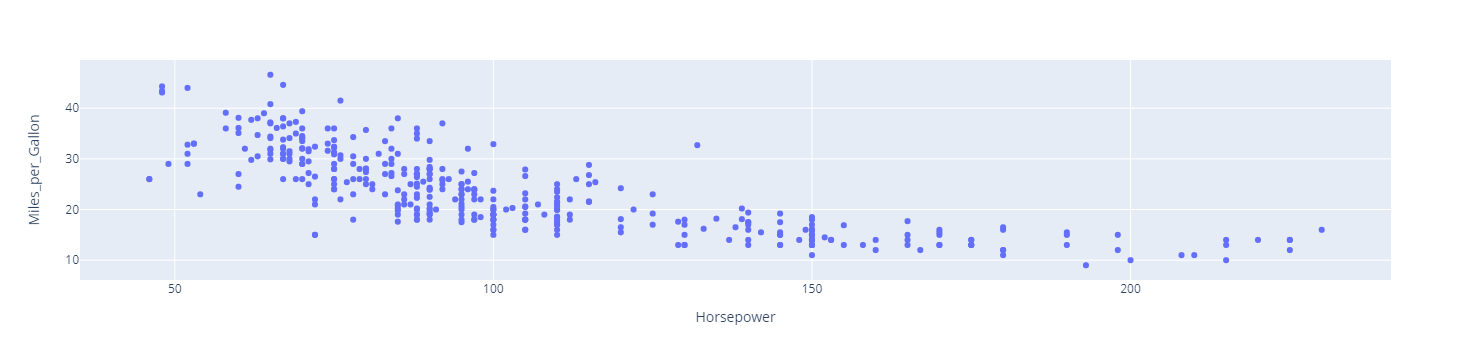

In [25]:
fig = px.scatter(df, x="Horsepower", y="Miles_per_Gallon")
fig.show()

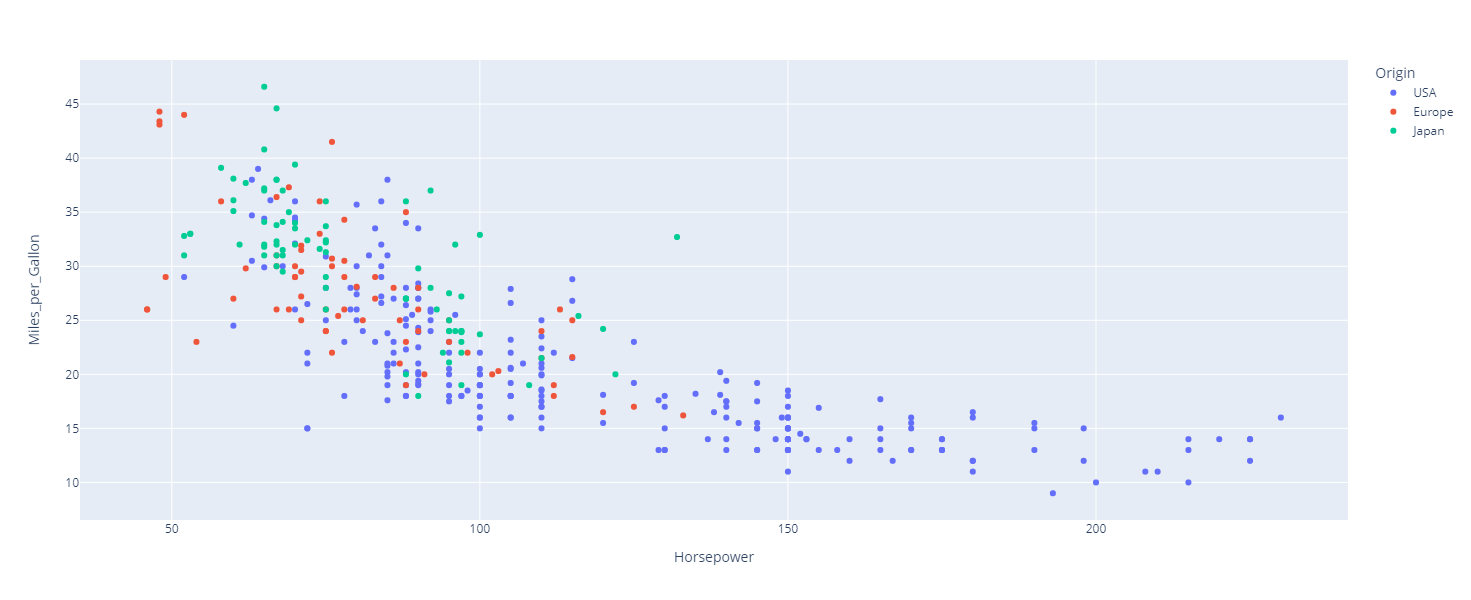

In [30]:
fig = px.scatter(df, x="Horsepower", y="Miles_per_Gallon", color="Origin",
                 hover_data=['Name'],
                 width=600, height=600)
fig.show()